<a href="https://colab.research.google.com/github/Nishant2018/LSTM-ENCODER-DECODER-RNN-ENGLISH---HINDI/blob/main/Copy_of_LSTM_%7C%7C_ENCODER_DECODER_%7C%7C_ENGLISH_HINDI_%7C%7C_%E2%9C%94%F0%9F%93%8C%F0%9F%94%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'english-hindi-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2502545%2F4246862%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240306%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240306T071504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D82998c0957cd91796349a17eed31ca9944cc70fca65b3d4d4cba7c006171a58cf6741e8f69591afb0365f2ede361a610e50b26644eec1e8d05f6659d0b614c3ee0cec0f07cee24c551ec3e87f4327f31bb6043e8ec910cd66e550ddaa405079a59dea3d3a1c93c41c5ea0378fae9be13a4624472bbc4d5931735abc593720efe498720decd489ebcf0d762dfb25815ea3723724f897263facf6bb150720a5e35807bcce4b4d132111919867dd2085e2471f1249d7b726901150971412dae74b4efd70d4f701b3dc47bfa975db1c47974451e59e748c6740885f2af9ecf0631172357076337f0119fbf1491f33e4fe0a211e003d4f95e408a2c2b28754cc1174a,ttf-file:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4536739%2F7758028%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240306%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240306T071504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da6211bf1884c7f6517ff0f31a59b6100f8fd5a8e12fed19602a54c165b9df623443b61f8812c320e983b4985d0874ee0c0973400e95459427b8a0c3231fdf1fc79028a76ee8690bca08ec11d8dfc1cf9dd13b237bc572b23f3bdab447fb49bccf1f76d346c22d9d841a321122ceb81779fa589ec6d07672711d4d6bb63478ca27970b8a2a45de1743d57442455b72bb525d71959e59fad0b4e2dfbf3eff96c615872d65c8593adf91c079bcce81db152c8a6eaa243f8f8cb74de6eb4c3ab7a1eb1aa40c0696fc3734f5a4625d2a1aabb3be2f85bb433eea031918248eeba368021500e9f55aace1ef28dd00328f89bfb53addac42ad2b4d9833ba015953d4c22'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 14525612 bytes downloaded
Downloaded and uncompressed: english-hindi-dataset
[==================================================] 30971 bytes downloaded
Downloaded and uncompressed: ttf-file
Data source import complete.



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     English To Hindi (LSTM || Encoder Decoder)
</div>

![](https://miro.medium.com/v2/resize:fit:1400/1*4OqZzRMNB7F5ixe3PDgB-Q.jpeg)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Ecoder Decoder Model Sample
</div>

![Encoder](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fe35687cc-a0b6-4838-ae2d-ced30f8416e0_2826x1272.png)


### Encoder-Decoder Architecture in RNNs:
- **Architecture**:
  - Comprises two RNNs: an Encoder and a Decoder.
  - Encoder processes the input sequence and converts it into a fixed-size context vector.
  - Decoder takes this context vector and generates the output sequence step by step.

- **Encoder**:
  - Takes input sequence one token at a time.
  - Outputs a context vector summarizing the input sequence.
  - Can use various RNN variants like LSTM or GRU.

- **Decoder**:
  - Takes the context vector from the Encoder and generates the output sequence.
  - Processes the output sequence step by step, incorporating information from the context vector.
  - Can have a different architecture from the Encoder, but typically uses the same RNN variant.

- **Training**:
  - During training, both Encoder and Decoder are jointly trained using teacher forcing.
  - Teacher forcing involves providing the correct previous target token as input to the Decoder at each step.

- **Inference**:
  - During inference, the Encoder processes the input sequence to obtain the context vector.
  - The Decoder generates the output sequence one token at a time based on the context vector and previously generated tokens.



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Seq2Seq
</div>

![Seq2Seq](https://classic.d2l.ai/_images/seq2seq.svg)

### Sequence-to-Sequence (seq2seq) Models:
- **Objective**:
  - Designed for tasks involving variable-length input and output sequences.
  - Examples include machine translation, text summarization, and question answering.

- **Input-Output Mapping**:
  - Maps an input sequence to an output sequence.
  - Both input and output sequences can have varying lengths.

- **Flexibility**:
  - Allows handling tasks where the length of the input sequence is different from the length of the output sequence.

- **Encoder-Decoder Paradigm**:
  - seq2seq models typically employ an Encoder-Decoder architecture.
  - Encoder processes the input sequence, capturing its meaning.
  - Decoder generates the output sequence based on the context provided by the Encoder.

- **Applications**:
  - Used in various natural language processing tasks such as machine translation, text summarization, and dialogue generation.
  - Also applicable in tasks like time series prediction and speech recognition.

- **Attention Mechanism**:
  - Often enhanced with attention mechanisms to improve performance.
  - Attention allows the model to focus on different parts of the input sequence dynamically while generating the output sequence.

- **Training**:
  - Trained end-to-end using backpropagation with teacher forcing during training.
  - Parameters are optimized to minimize a suitable loss function such as cross-entropy loss.

- **Evaluation**:
  - Evaluated based on metrics specific to the task, such as BLEU score for machine translation or ROUGE score for text summarization.



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Steps (Preprocessing -> Model Creation)
</div>

Certainly! Here are the steps for English to Hindi conversion using encoder-decoder in RNN:

1. **Data Collection**:
   - Gather parallel text data consisting of English sentences paired with their corresponding Hindi translations. Sources can include translated literature, bilingual websites, language corpora, or user-generated content.

2. **Data Preprocessing**:
   - **Text Cleaning**:
     - Remove noise such as special characters, punctuation, HTML tags, and URLs from both English and Hindi text data.
   - **Tokenization**:
     - Split the text into individual words or tokens for both English and Hindi sentences.
   - **Lowercasing**:
     - Convert all text to lowercase for both languages to ensure consistency.
   - **Handling Special Characters**:
     - Handle special characters unique to Hindi script, such as consonant-vowel combinations.
   - **Padding**:
     - Ensure that all sequences have the same length by padding shorter sequences with a special token.

3. **Feature Extraction**:
   - **Word Embeddings**:
     - Convert words in both English and Hindi sentences into dense vector representations using pre-trained word embeddings like Word2Vec or GloVe.
   - **Sequence Representation**:
     - Represent each sequence of words in both English and Hindi sentences as numerical vectors.

4. **Model Architecture**:
   - **Encoder-Decoder Architecture**:
     - Implement an encoder-decoder architecture using Recurrent Neural Networks (RNNs) or Long Short-Term Memory (LSTM) networks.
     - The encoder processes the input English sentence and encodes its meaning into a fixed-length context vector.
     - The decoder then uses this context vector to generate the corresponding Hindi translation word by word.

5. **Training the Model**:
   - **Data Splitting**:
     - Split the parallel text data into training, validation, and test sets.
   - **Loss Function**:
     - Define a suitable loss function such as categorical cross-entropy to measure the difference between the predicted and actual Hindi translations.
   - **Optimizer**:
     - Select an optimizer like Adam or RMSprop to minimize the loss during training.
   - **Training**:
     - Train the encoder-decoder model on the training data, adjusting the model's parameters to minimize the loss on the validation set.

6. **Model Evaluation**:
   - **Performance Metrics**:
     - Evaluate the model's performance on the test set using metrics such as BLEU score, accuracy, or perplexity.
     - BLEU score measures the similarity between the predicted and reference Hindi translations.

7. **Inference**:
   - **Prediction**:
     - Use the trained encoder-decoder model to translate English sentences into Hindi by feeding them through the encoder and decoding the output using the decoder.

8. **Post-Processing**:
   - **Decoding**:
     - Decode the numerical representations of Hindi words back into their textual form.
   - **Visualization**:
     - Visualize the translated Hindi sentences alongside their original English counterparts for inspection and validation.

9. **Model Fine-Tuning (Optional)**:
   - Fine-tune the encoder-decoder model based on feedback or additional data to improve translation accuracy.

10. **Deployment**:
   - Deploy the trained English to Hindi translation model for use in applications requiring real-time or batch translation services.

11. **Monitoring and Maintenance**:
   - Monitor the model's performance in production and update it as needed to adapt to changing language patterns or requirements.


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Importing Libraries
</div>

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import indian
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import unicodedata
from keras.models import Sequential,Model
from keras.layers import Input,Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import spacy
import contractions
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Reading the Data
</div>

In [ ]:
data = pd.read_csv('/kaggle/input/english-hindi-dataset/Dataset_English_Hindi.csv')


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    English-Hindi Sample Data
</div>

In [ ]:
data.sample(5)

,English,Hindi
19177,Sheikh was identified as the person under whos...,शेख की पहचान उस शस के रूप में की गई जिसके निर्...
49200,"Sows , after farrowing , come into heat betwee...",बच्चे पैदा करने के बाद बच्चों का दूध छुड़वाने ...
69373,"Premchand was a revolutionary writer, he for t...",प्रेमचंद एक क्रांतिकारी रचनाकार थे उन्होंने न ...
67762,These are adorned with golden leaves and preci...,इनमें सुवर्ण पर्त भी मढी है तथा बहुमूल्य रत्न ...
40308,"However as soon as he collided with the table,...",हालांकि जैसे ही ये मेज की ओर कूदे तब मेज का को...



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Data Preprocessing
</div>

* Null Value Checking and Removing

In [ ]:
data.isnull().sum()

English      2
Hindi      312
dtype: int64

In [ ]:
data.dropna(inplace = True )

* LOWERCASING

In [ ]:
data['English'] = data['English'].str.lower()

* Removing HTML Tags

In [ ]:
def remove_html(text):
    if isinstance(text,str):

        pattern = re.compile('<.*?>')
        return pattern.sub(r'',text)
    else:
        return text

data['English'] = data['English'].apply(remove_html)
data['Hindi'] = data['Hindi'].apply(remove_html)

* Removing URL's

In [ ]:
def remove_url(text):
    if isinstance(text,str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'',text)
    else:
        return
data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

* Remove Non-Hindi and Alphanumeric characters

In [ ]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text

    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

* Removing Punctuations

In [ ]:
#English Punctuations...........
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def get_hindi_punctuations():
    hindi_punctuations = []
    for i in range(0x2000, 0x206f + 1):
        char = chr(i)
        if unicodedata.category(char) == 'Po':
            hindi_punctuations.append(char)
    return ''.join(hindi_punctuations)

# Get Hindi punctuation characters
hindi_punctuation = get_hindi_punctuations()

# Print Hindi punctuation characters
print('Hindi Punctuation: ', hindi_punctuation)

Hindi Punctuation:  ‖‗†‡•‣․‥…‧‰‱′″‴‵‶‷‸※‼‽‾⁁⁂⁃⁇⁈⁉⁊⁋⁌⁍⁎⁏⁐⁑⁓⁕⁖⁗⁘⁙⁚⁛⁜⁝⁞


In [ ]:
def remove_punctuation(text, language = 'English'):
    if language == 'English':
        exclude_english = set(string.punctuation)
        return ''.join(char for char in text if char not in exclude_english)
    elif language == 'Hindi':
        return ''.join(char for char in text if char not in hindi_punctuation)

    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")


data['English'] = data['English'].apply(lambda x: remove_punctuation(x,language = 'English'))
data['Hindi'] = data['Hindi'].apply(lambda x: remove_punctuation(x,language = 'Hindi'))

* Removing contractions

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

* Tokenize the text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

data['English'] = data['English'].apply(do_tokenization)
data['Hindi'] = data['Hindi'].apply(do_tokenization)

In [ ]:
data.sample(5)

,English,Hindi
2653,"[you, will, be, all, right, again, in, a, coup...","[तुम, दो, तीन, दिनों, में, फिरसे, ठीक, हो, जाओ..."
112078,"[when, roy, reached, mexico, general, venustia...","[जब, राय, मैक़्सिको, पहुंचे, जनरल, वानुस्त्यार..."
82859,"[and, they, said, can, we, touch, iti, said, i...","[और, उन्होंने, कहा, हम, उसे, छू, सकते, हैं, मै..."
103847,"[after, reading, you, should, follow, koran, t...","[पढ़, कर, कुरान, पर, विचार, करना, उसके, पीछे, ..."
120309,"[that, i, have, lost, for, so, many, years]","[मैंने, इतने, वर्षो, में, खो, दी, थी]"


* Removing Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('indian')

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


True

In [ ]:
len(nltk.corpus.indian.words('hindi.pos'))

9408

In [ ]:
stop_words_english = set(stopwords.words('english'))
stop_words_hindi = set(nltk.corpus.indian.words('hindi.pos'))

In [ ]:
def remove_stopwords(text,language = 'english'):
    if language == 'english':
        filtered_words_english = [word for word in text if word.lower() not in stop_words_english]
        return ' '.join(filtered_words_english)
    elif language == 'hindi':
        filterd_words_hindi = [word for word in text if word not in stop_words_hindi]
        return ' '.join(filterd_words_hindi)
    else:
        return ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['English'] = data['English'].apply(lambda x :remove_stopwords(x,language = 'english'))
data['Hindi'] = data['Hindi'].apply(lambda x :remove_stopwords(x,language = 'hindi'))

In [ ]:
data.sample(5)

,English,Hindi
72069,submerge beautiful statues,सुन्दर प्रतिमाओं डुबा लेता
48762,however adjustments facial appearance traumati...,चूँकि कोमल उम्र बच्चों मानसिक कोमल बच्चों करके...
42323,muslim population world,जनसंख्या।
68955,matters mind,आत्मीय विषयों मे
117393,17th december 1928 bhagat singh two close asso...,दिसंबर भगत करीबी साथियों राजगुरू आजाद अधीक्षक ...


* Stemming the text

In [ ]:
def do_stemming(token_words):
    ps = PorterStemmer()
    words = token_words.split()
    return [ps.stem(word) for word in words]

data['English'] = data['English'].apply(do_stemming)
data['Hindi'] = data['Hindi'].apply(do_stemming)

In [ ]:
data.sample(5)

,English,Hindi
86864,"[discuss, differ, sometim, overemphas]","[मतभेदों, जरूरत, ज़्यादा, जोर]"
37518,"[mayb, one, year, begin]","[नहीं।, शुरूआत, है।]"
4018,"[kala, ghoda, utsavcelebr, art, exhibit, diffe...","[काला, घोड़ा, कला, उत्सव, कला, कलाक्षेत्रों, न..."
117438,"[success, writer, patriot, citizen, effici, or...","[लेखक, देशभक्त, कुशल, वक्ता, ज़िम्मेदार, संपाद..."
26615,"[nana, sahib, defeat, kanpur]","[नाना, साहेब, कानपुर, पराजित, पड़ा]"



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Word Cloud
</div>

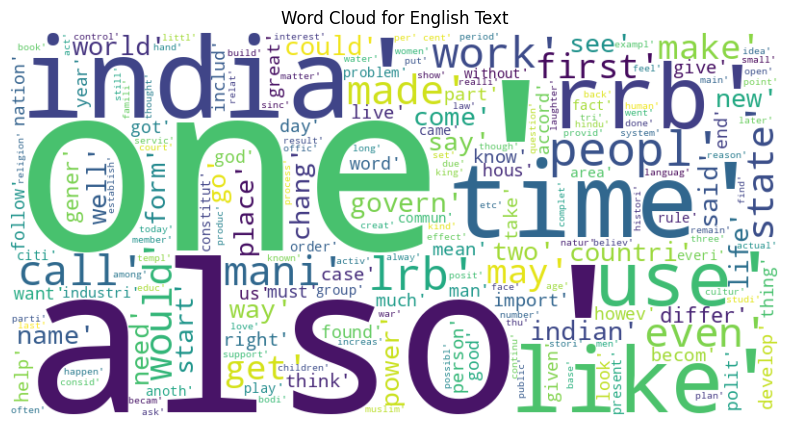

In [ ]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))

    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'English')
#generate_wordcloud(data['Hindi'], 'Hindi')



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Train Test Split
</div>

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [ ]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [ ]:
# Add special tokens to the Hindi tokenizer
tok_hindi.word_index['<start>'] = len(tok_hindi.word_index) + 1
tok_hindi.word_index['<end>'] = len(tok_hindi.word_index) + 1

In [ ]:
len(tok.word_index), len(tok_hindi.word_index)

(56738, 75241)

In [ ]:
def add_special_tokens(sequences, start_token='<start>', end_token='<end>'):
    sequences_with_special_tokens = []
    for sequence in sequences:
        sequence_with_special_tokens = [start_token] + sequence + [end_token]
        sequences_with_special_tokens.append(sequence_with_special_tokens)
    return sequences_with_special_tokens

data['Hindi'] = add_special_tokens(data['Hindi'])

In [ ]:
#Now we are goining to convert text to sequences.......
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [ ]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(data['English'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(data['Hindi'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  218
Maximum sequence length in combined dataset x:  135


In [ ]:
english = data['English']
hindi = data['Hindi']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(english,hindi,test_size = 0.2, random_state = 42)

In [ ]:
print("Training set shape: ",x_train.shape,y_train.shape)
print("Testing set shape: ",x_test.shape,y_test.shape)

Training set shape:  (104129,) (104129,)
Testing set shape:  (26033,) (26033,)


In [ ]:
x_train_main = pad_sequences(x_train, maxlen=max_length_combined_x, padding='post')
y_train_main = pad_sequences(y_train, maxlen=max_length_combined_y, padding='post')

In [ ]:
x_test_main = pad_sequences(x_test, maxlen=max_length_combined_x, padding='post')
y_test_main = pad_sequences(y_test, maxlen=max_length_combined_y, padding='post')

In [ ]:
start_token_index = tok_hindi.word_index['<start>']
end_token_index = tok_hindi.word_index['<end>']

print("Index of <start> token:", start_token_index)
print("Index of <end> token:", end_token_index)

Index of <start> token: 75240
Index of <end> token: 75241


In [ ]:
for num in x_train_main[9]:
    print(num,end = " ")

15056 395 39 357 3485 34 12681 4603 7280 1631 6859 520 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Corresponding words .........
for num in x_train_main[9]:
    word = tok.index_word.get(num,'UNK')
    print(word,end = " ")

palataka poet come earth brood life patho ironi fugit joy fragil claim UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Padding of the data
</div>

In [ ]:
x_train_main

array([[ 122, 1433,  802, ...,    0,    0,    0],
       [ 165,  671, 1220, ...,    0,    0,    0],
       [2304, 2025,  331, ...,    0,    0,    0],
       ...,
       [  71,   17, 3396, ...,    0,    0,    0],
       [   9,    8,   51, ...,    0,    0,    0],
       [ 668,  654, 1035, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_test_main

array([[75240, 25359, 20397, ...,     0,     0,     0],
       [75240,   485, 18199, ...,     0,     0,     0],
       [75240,   968,    61, ...,     0,     0,     0],
       ...,
       [75240, 65179,  1645, ...,     0,     0,     0],
       [75240,   371,   490, ...,     0,     0,     0],
       [75240,  2421,  5824, ...,     0,     0,     0]], dtype=int32)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    LSTM || ENCODER-DECODER MODEL || RNN
</div>

![MODEL](https://www.researchgate.net/publication/340443252/figure/fig1/AS:876840973520898@1586066587656/Encoder-decoder-model-using-stacked-LSTMs-for-encoding-and-one-LSTM-layer-for-decoding.ppm)

In [ ]:
input_seq_length = max_length_combined_x
output_seq_length = max_length_combined_y

In [ ]:
# Vocabulary sizes for training data
num_encoder_tokens = len(tok.word_index) + 1
num_decoder_tokens = len(tok_hindi.word_index) + 1

In [ ]:
#Define LSTM dimensions........
latent_dim = 256

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
encoder_inputs = Input(shape = (input_seq_length,))
#Embedding layer.......
encoder_embedding = Embedding(input_dim = num_encoder_tokens, output_dim = latent_dim, mask_zero= True)(encoder_inputs)
#Encoder LSTM
encoder_lstm = LSTM(latent_dim,return_state = True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

#Discard enoder outputs and keep only the states...........
encoder_states = [state_h, state_c]

#Define the decoder input...........
decoder_inputs = Input(shape = (None,)) #None for variable sequence length .............

#Define decoder embedding layer
decoder_embedding = Embedding(num_decoder_tokens,latent_dim,mask_zero = True)
decoder_embedding_outputs = decoder_embedding(decoder_inputs)

#Define decoder LSTM
decoder_lstm = LSTM(latent_dim,return_sequences= True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(decoder_embedding_outputs,initial_state = encoder_states)

#Define decoder output layer.......
decoder_dense = Dense(num_decoder_tokens,activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

#Define the modek.......
model = Model([encoder_inputs,decoder_inputs] , decoder_outputs)
optimizer = Adam(clipvalue=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 218)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 218, 256)             1452518   ['input_1[0][0]']             
                                                          4                                       
                                                                                                  
 embedding_1 (Embedding)     (None, None, 256)            1926195   ['input_2[0][0]']         

In [ ]:
history = model.fit([x_train_main, y_train_main[:, :-1]], y_train_main.reshape(y_train_main.shape[0], y_train_main.shape[1], 1)[:, 1:],
          validation_split=0.2,
          batch_size= 32,
          epochs= 50)

Epoch 1/50
  15/2604 [..............................] - ETA: 12:41:14 - loss: 11.1658 - accuracy: 0.2033

KeyboardInterrupt: 

In [ ]:
model.save('seq2seq_model.h5')


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Model Training Graph
</div>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Prediction
</div>

In [ ]:
# Import necessary libraries
import numpy as np

# Define the indices_to_text function
def indices_to_text(indices, tokenizer):
    sentence = ""
    for idx in indices:
        if idx == 0:
            continue
        word = tokenizer.index_word.get(idx, '<UNK>')
        sentence += word + " "
    return sentence.strip()

# Define batch size for prediction
batch_size = 16  # You can adjust this value according to available memory

# Initialize list to store predicted sentences
predicted_sentences = []

# Iterate through the test data in batches
for i in range(0, len(x_test_main), batch_size):
    # Get a batch of test data
    x_batch = x_test_main[i:i+batch_size]
    y_batch = y_test_main[i:i+batch_size, :-1]

    # Perform prediction on the batch
    predictions = model.predict([x_batch, y_batch])

    # Process predictions and convert indices to text
    for prediction in predictions:
        predicted_sentence = indices_to_text(np.argmax(prediction, axis=1), tok_hindi)  # Assuming tokenizer_hindi is the tokenizer used for Hindi
        predicted_sentences.append(predicted_sentence)

# Print predicted sentences
for i, sentence in enumerate(predicted_sentences):
    print("Predicted sentence", i+1, ":", sentence)


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Convert numpy arrays to lists of strings
actual_sentences = [indices_to_text(sentence, tok_hindi) for sentence in y_test_main]
predicted_sentences = [sentence for sentence in predicted_sentences]

# Tokenize actual target sentences
actual_tokenized = [sentence.split() for sentence in actual_sentences]

# Tokenize predicted sentences
predicted_tokenized = [sentence.split() for sentence in predicted_sentences]

from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
smoother = SmoothingFunction().method1
bleu_score = corpus_bleu(actual_tokenized, predicted_tokenized, smoothing_function=smoother)

# Print BLEU score
print("BLEU Score:", bleu_score)
